#Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df_backup = pd.read_csv('drive/MyDrive/loan_data_2007_2014.csv').drop('Unnamed: 0', axis = 1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df_backup.copy()

# Explore Data

In [ ]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ax = df.dtypes.values[df.dtypes == 'O']
df.columns.values 

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

# Preprocessing continuous variable

In [ ]:
cont_var = ['emp_length', 'earliest_cr_line', 'term', 'issue_d']
df[cont_var]

,emp_length,earliest_cr_line,term,issue_d
0,10+ years,Jan-85,36 months,Dec-11
1,< 1 year,Apr-99,60 months,Dec-11
2,10+ years,Nov-01,36 months,Dec-11
3,10+ years,Feb-96,36 months,Dec-11
4,1 year,Jan-96,60 months,Dec-11
...,...,...,...,...
466280,4 years,Apr-03,60 months,Jan-14
466281,10+ years,Jun-97,60 months,Jan-14
466282,7 years,Dec-01,60 months,Jan-14
466283,3 years,Feb-03,36 months,Jan-14


#### Column emp_length

In [ ]:
df.emp_length.astype(str)

0         10+ years
1          < 1 year
2         10+ years
3         10+ years
4            1 year
            ...    
466280      4 years
466281    10+ years
466282      7 years
466283      3 years
466284    10+ years
Name: emp_length, Length: 466285, dtype: object

In [ ]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [ ]:
df['emp_length_2'] = df.emp_length.str.replace('< 1 year',str(0))
df['emp_length_2'] = df.emp_length_2.str.replace(' years','')
df['emp_length_2'] = df.emp_length_2.str.replace(' year','')
df['emp_length_2'] = df.emp_length_2.str.replace(' s','')
df['emp_length_2'] = df.emp_length_2.str.replace('\+','')
df['emp_length_2'] = df.emp_length_2.fillna(str(0))
#Menghilangkan kata year,years dan mengisi data yang null menjadi 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
df.emp_length_2.unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7'],
      dtype=object)

In [ ]:
df.emp_length_2 = pd.to_numeric(df.emp_length_2)
#Mengubah value menjadi numeric

In [ ]:
df.emp_length_2.unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [ ]:
df.emp_length_2

0         10
1          0
2         10
3         10
4          1
          ..
466280     4
466281    10
466282     7
466283     3
466284    10
Name: emp_length_2, Length: 466285, dtype: int64

#### Column earliest_cr_line

In [ ]:
df.earliest_cr_line.head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [ ]:
df['earliest_cr_line_2'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
#Mengubah format earliest_cr_line menjadi YYYY-MM-DD

In [ ]:
df.earliest_cr_line_2.head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_2, dtype: datetime64[ns]

In [ ]:
days = pd.to_datetime('2017-12-01') - df.earliest_cr_line_2
months = days/np.timedelta64(1,'M')

In [ ]:
df['mths_since_ecl'] = round(pd.to_numeric(months))
#Membuat kolom baru dengan value perbedaan bulan antara 2017-12-01 dengan value dari earliest_cr_line dan dibulatkan

In [ ]:
df.mths_since_ecl

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: mths_since_ecl, Length: 466285, dtype: float64

In [ ]:
df['mths_since_ecl'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_ecl, dtype: float64

In [ ]:
df.loc[:,['earliest_cr_line_2','earliest_cr_line']][df.mths_since_ecl < 0]
#Terdapat value mths_since_ecl yang lebih kecil dari 0
#Terdapat error yaitu beberapa data tahun lebih besar dari 2017 sehingga nilai dari mths_since_ecl lebih kecil dari 0
#Error berupa kesalahan dari fungsi pd.datetime

,earliest_cr_line_2,earliest_cr_line
1580,2062-09-01,Sep-62
1770,2068-09-01,Sep-68
2799,2064-09-01,Sep-64
3282,2067-09-01,Sep-67
3359,2065-02-01,Feb-65
...,...,...
464003,2068-01-01,Jan-68
464260,2066-07-01,Jul-66
465100,2067-10-01,Oct-67
465500,2067-09-01,Sep-67


In [ ]:
df.earliest_cr_line_2 = df.earliest_cr_line_2.astype(str)
#Mengubah type dari earliest_cr_line_2 menjadi string

In [ ]:
type(df.earliest_cr_line_2[463565])
#Mengecek value type dari earliest_cr_line_2

str

In [ ]:
df.earliest_cr_line_2[df.mths_since_ecl < 0] = df.earliest_cr_line_2[df.mths_since_ecl < 0].str.replace('20','19')
#Mengganti tahun dari earliest_cr_line_2 yang salah


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.earliest_cr_line_2

0         1985-01-01
1         1999-04-01
2         2001-11-01
3         1996-02-01
4         1996-01-01
             ...    
466280    2003-04-01
466281    1997-06-01
466282    2001-12-01
466283    2003-02-01
466284    2000-02-01
Name: earliest_cr_line_2, Length: 466285, dtype: object

In [ ]:
df.earliest_cr_line_2 = pd.to_datetime(df.earliest_cr_line_2, yearfirst = True)
#Mengubah kembali type earliest_cr_line menjadi datetime

In [ ]:
df.earliest_cr_line_2[df.mths_since_ecl < 0]
#Mengecek value earliest_cr_line_2 dari mths_since_ecl yang negatif

1580     1962-09-01
1770     1968-09-01
2799     1964-09-01
3282     1967-09-01
3359     1965-02-01
            ...    
464003   1968-01-01
464260   1966-07-01
465100   1967-10-01
465500   1967-09-01
465655   1956-01-01
Name: earliest_cr_line_2, Length: 1169, dtype: datetime64[ns]

In [ ]:
days_2 = pd.to_datetime('2017-12-01') - df.earliest_cr_line_2
months_2 = days_2/np.timedelta64(1,'M')
days_2

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_2, Length: 466285, dtype: timedelta64[ns]

In [ ]:
df['mths_since_ecl'] = round(pd.to_numeric(months_2))

In [ ]:
df['mths_since_ecl'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_ecl, dtype: float64

#### issue_d

In [ ]:
df.issue_d

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [ ]:
df['issue_d_2'] = pd.to_datetime(df.issue_d,format = '%b-%y')
days_issue = pd.to_datetime('2017-12-01')-df.issue_d_2
months_issue = days_issue/np.timedelta64(1,'M')
#Mengubah type issue_d menjadi datetime lalu menghitung berapa lamanya bulan issue_d dari 2017-12-01

In [ ]:
df['mths_since_issue_d'] = round(pd.to_numeric(months_issue))
#Membuat kolom baru mths_since_issue_d dengan value lamanya issue_d dari 2017-12-01 dalam bulan

In [ ]:
df.mths_since_issue_d.describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

#### term

In [ ]:
df.term

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [ ]:
df['term_2'] = pd.to_numeric(df.term.str.replace(' months','')) 
#Membuat kolom baru term_2 dengan value dari term dan merubah data type menjadi numeric

In [ ]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_2,earliest_cr_line_2,mths_since_ecl,issue_d_2,mths_since_issue_d,term_2
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1985-01-01,395.0,2011-12-01,72.0,36


# Preprocessing discrete variable

In [ ]:
disc_var = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status']
df[disc_var].describe()

,grade,sub_grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status
count,466285,466285,466285,466285,466285,466285,466285,466285
unique,7,35,6,3,9,14,50,2
top,B,B3,MORTGAGE,Verified,Current,debt_consolidation,CA,f
freq,136929,31686,235875,168055,224226,274195,71450,303005


#### creating dummies

In [ ]:
df_dummies = []
for i in disc_var:
  df_dummies.append(pd.get_dummies(df[i], prefix = i, prefix_sep = '_'))
df_dummies

[        grade_A  grade_B  grade_C  grade_D  grade_E  grade_F  grade_G
 0             0        1        0        0        0        0        0
 1             0        0        1        0        0        0        0
 2             0        0        1        0        0        0        0
 3             0        0        1        0        0        0        0
 4             0        1        0        0        0        0        0
 ...         ...      ...      ...      ...      ...      ...      ...
 466280        0        0        1        0        0        0        0
 466281        0        0        0        1        0        0        0
 466282        0        0        0        1        0        0        0
 466283        1        0        0        0        0        0        0
 466284        0        0        0        1        0        0        0
 
 [466285 rows x 7 columns],
         sub_grade_A1  sub_grade_A2  sub_grade_A3  sub_grade_A4  sub_grade_A5  \
 0                  0             0  

In [ ]:
df_dummies = pd.concat(df_dummies,axis=1)

In [ ]:
df_dummies.columns.values

array(['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified',
       'verification_status_Verified', 'lo

In [ ]:
df = pd.concat([df,df_dummies],axis=1)

In [ ]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_2,earliest_cr_line_2,mths_since_ecl,issue_d_2,mths_since_issue_d,term_2,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,initial_list_status_w
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.0,861.07,0.0,0.0,0.0,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1985-01-01,395.0,2011-12-01,72.0,36,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

# Check Missing Value

In [ ]:
null_var = df.isnull().sum()[lambda input: df.isnull().sum().values>0]
null_var

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

In [ ]:
df[null_var.index]

,emp_title,emp_length,annual_inc,desc,title,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,earliest_cr_line_2,mths_since_ecl
0,NaN,10+ years,24000.0,Borrower added on 12/22/11 > I need to upgra...,Computer,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,83.7,9.0,Jan-15,NaN,Jan-16,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-01-01,395.0
1,Ryder,< 1 year,30000.0,Borrower added on 12/22/11 > I plan to use t...,bike,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,9.4,4.0,Apr-13,NaN,Sep-13,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-04-01,224.0
2,NaN,10+ years,12252.0,NaN,real estate business,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,98.5,10.0,Jun-14,NaN,Jan-16,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-11-01,193.0
3,AIR RESOURCES BOARD,10+ years,49200.0,Borrower added on 12/21/11 > to pay for prop...,personel,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,21.0,37.0,Jan-15,NaN,Jan-15,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-02-01,262.0
4,University Medical Group,1 year,80000.0,Borrower added on 12/21/11 > I plan on combi...,Personal,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,53.9,38.0,Jan-16,Feb-16,Jan-16,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,Financial Advisor,4 years,110000.0,NaN,Debt consolidation,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,77.6,36.0,Jan-16,Feb-16,Jan-16,0.0,NaN,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,2003-04-01,176.0
466281,Chief of Interpretation (Park Ranger),10+ years,78000.0,NaN,Debt consolidation,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,46.3,30.0,Dec-14,NaN,Jan-16,0.0,NaN,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,1997-06-01,246.0
466282,patrol,7 years,46000.0,Borrower added on 12/06/13 > I am going to c...,Debt consolidation,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,51.1,43.0,Jan-16,Feb-16,Dec-15,0.0,NaN,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,2001-12-01,192.0
466283,Server Engineer Lead,3 years,83000.0,NaN,Credit card refinancing,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,21.5,27.0,Dec-14,NaN,Apr-15,0.0,NaN,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,2003-02-01,178.0


In [ ]:
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)

In [ ]:
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [ ]:
for i in ['mths_since_ecl', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', 
            'delinq_2yrs', 'emp_length_2']:
    df[i].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# Probability of Default Model

## Data Preparation

### Good/Bad from loan_status

In [ ]:
df.loan_status.value_counts(normalize = True)
#Melihat value dari loan_status dan proporsinya dalam bentuk persen

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [ ]:
map = {'Charged Off':0,'Late (31-120 days)':0,'Does not meet the credit policy. Status:Charged Off':0,'Default' : 0, 
       'Current':1,'Fully Paid':1,'In Grace Period':1,'Does not meet the credit policy. Status:Fully Paid':1,'Late (16-30 days)':1}
df['good_bad'] = df.loan_status.map(map)
df.good_bad.value_counts()
#Memberi value 0(bad) untuk beberapa status dari loan_status dan value 1(good) untuk beberapa status dari loan_status

1    415317
0     50968
Name: good_bad, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


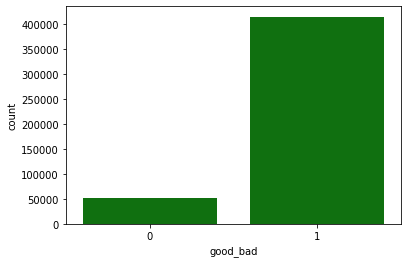

In [ ]:
sns.countplot(df.good_bad.astype('object'),color = 'green')

## Multicollinearity Check

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(train_inputs)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,grade_A,45.090269
2,grade_B,53.398788
3,grade_C,41.423256
4,grade_D,24.922489
5,grade_E,11.756285
...,...,...
86,total_acc,2.194949
87,acc_now_delinq,1.016868
88,total_rev_hi_lim,1.245916
89,annual_inc,1.268969


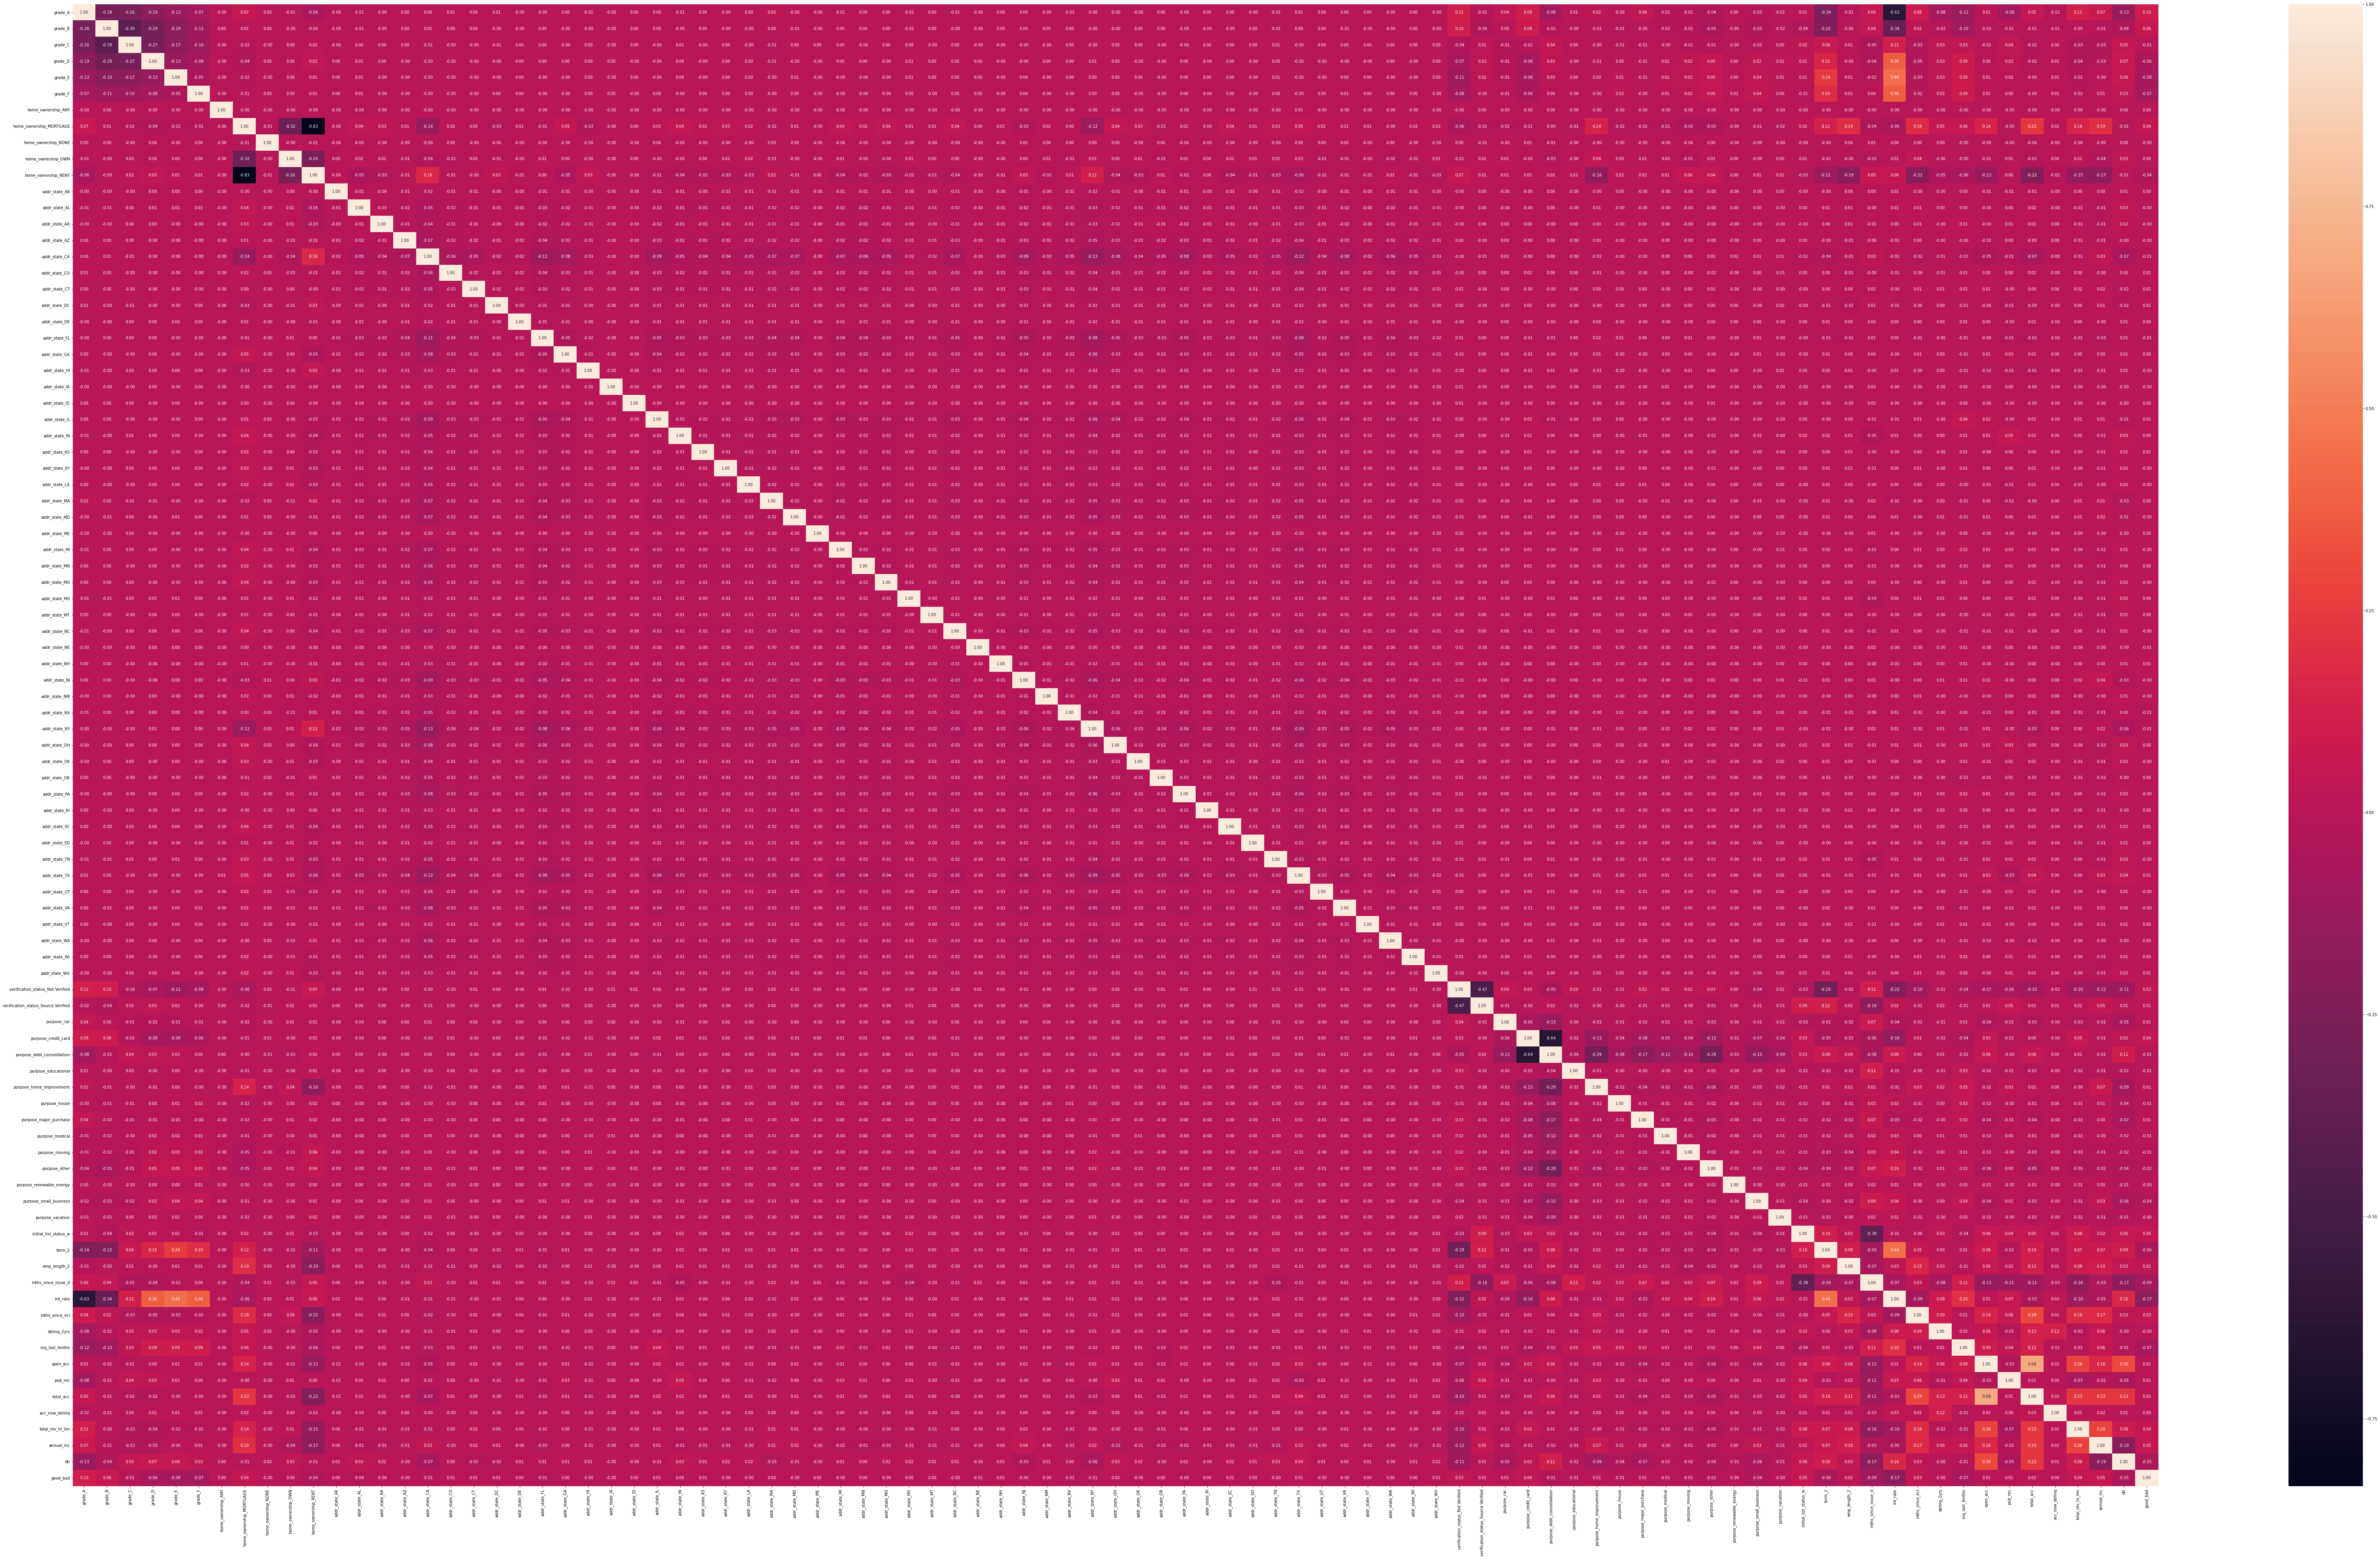

In [ ]:
df_train = pd.concat([train_inputs, df_targets_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(120,70))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Terdapat correlation yang tinggi (0.83) antara home_ownership_MORTGAGE dan home_ownership_RENT,sehingga harus di drop salah satu

### Logistic Regression

### Splitting Data 

In [ ]:
df_inputs_train, df_inputs_test, df_targets_train, df_targets_test = train_test_split(df.drop('good_bad', axis = 1), df['good_bad'], test_size = 0.2, random_state = 42)

In [ ]:
df_inputs_train.shape

(373028, 206)

In [ ]:
df_inputs_test.shape

(93257, 206)

In [ ]:
df_targets_train.shape

(373028,)

In [ ]:
df_targets_test.shape

(93257,)

In [ ]:
df_targets_test.head()

362514    1
288564    1
213591    1
263083    1
165001    1
Name: good_bad, dtype: int64

In [ ]:
df_inputs_train_2 = df_inputs_train.loc[:,['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
'addr_state_AK', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC',
       'addr_state_DE', 'addr_state_FL', 'addr_state_GA', 'addr_state_HI',
       'addr_state_IA', 'addr_state_ID', 'addr_state_IL', 'addr_state_IN',
       'addr_state_KS', 'addr_state_KY', 'addr_state_LA', 'addr_state_MA',
       'addr_state_MD', 'addr_state_ME', 'addr_state_MI', 'addr_state_MN',
       'addr_state_MO', 'addr_state_MS', 'addr_state_MT', 'addr_state_NC',
       'addr_state_NE', 'addr_state_NH', 'addr_state_NJ', 'addr_state_NM',
       'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK',
       'addr_state_OR', 'addr_state_PA', 'addr_state_RI', 'addr_state_SC',
       'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT',
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
'initial_list_status_f',
'initial_list_status_w',
'term_2',
'emp_length_2',
'mths_since_issue_d',
'int_rate',
'mths_since_ecl',
'delinq_2yrs',
'inq_last_6mths',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim',
'annual_inc',
'dti'
]]

In [ ]:
drop_cat = ['grade_G',
'home_ownership_RENT',
'addr_state_WY',
'verification_status_Verified',
'purpose_wedding',
'initial_list_status_f']

In [ ]:
train_inputs = df_inputs_train_2.drop(drop_cat,axis=1)
train_inputs

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,verification_status_Not Verified,verification_status_Source Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,initial_list_status_w,term_2,emp_length_2,mths_since_issue_d,int_rate,mths_since_ecl,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,annual_inc,dti
427211,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,3,45.0,8.90,372.0,0.0,1.0,20.0,0.0,32.0,0.0,57000.0,77000.0,21.91
206088,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,6,64.0,14.33,240.0,1.0,2.0,15.0,0.0,38.0,0.0,10000.0,112000.0,7.49
136020,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,10,54.0,8.90,317.0,0.0,1.0,9.0,0.0,20.0,0.0,33300.0,84000.0,14.83
412305,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,7,44.0,16.59,230.0,1.0,3.0,9.0,0.0,13.0,0.0,12500.0,43000.0,13.68
36159,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,36,5,101.0,12.84,233.0,0.0,1.0,14.0,0.0,30.0,0.0,8400.0,94000.0,22.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,36,3,37.0,8.67,270.0,1.0,0.0,10.0,1.0,19.0,0.0,8200.0,71000.0,15.80
365838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,10,42.0,12.49,169.0,1.0,1.0,15.0,0.0,19.0,0.0,34300.0,72000.0,11.99
131932,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,10,54.0,14.09,159.0,0.0,0.0,7.0,0.0,12.0,0.0,36171.0,80000.0,3.98
146867,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,10,56.0,11.14,251.0,0.0,0.0,13.0,0.0,37.0,0.0,36100.0,69000.0,24.90


In [ ]:
train_inputs.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
df_targets_train

427211    1
206088    1
136020    1
412305    0
36159     0
         ..
259178    1
365838    1
131932    1
146867    1
121958    1
Name: good_bad, Length: 373028, dtype: int64

In [ ]:
df_inputs_test_2 = df_inputs_test.loc[:,['grade_A',
'grade_B',
'grade_C',
'grade_D',
'grade_E',
'grade_F',
'grade_G',
'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT',
'addr_state_AK', 'addr_state_AL', 'addr_state_AR', 'addr_state_AZ',
       'addr_state_CA', 'addr_state_CO', 'addr_state_CT', 'addr_state_DC',
       'addr_state_DE', 'addr_state_FL', 'addr_state_GA', 'addr_state_HI',
       'addr_state_IA', 'addr_state_ID', 'addr_state_IL', 'addr_state_IN',
       'addr_state_KS', 'addr_state_KY', 'addr_state_LA', 'addr_state_MA',
       'addr_state_MD', 'addr_state_ME', 'addr_state_MI', 'addr_state_MN',
       'addr_state_MO', 'addr_state_MS', 'addr_state_MT', 'addr_state_NC',
       'addr_state_NE', 'addr_state_NH', 'addr_state_NJ', 'addr_state_NM',
       'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK',
       'addr_state_OR', 'addr_state_PA', 'addr_state_RI', 'addr_state_SC',
       'addr_state_SD', 'addr_state_TN', 'addr_state_TX', 'addr_state_UT',
       'addr_state_VA', 'addr_state_VT', 'addr_state_WA', 'addr_state_WI',
       'addr_state_WV', 'addr_state_WY',
'verification_status_Not Verified',
'verification_status_Source Verified',
'verification_status_Verified',
'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
'initial_list_status_f',
'initial_list_status_w',
'term_2',
'emp_length_2',
'mths_since_issue_d',
'int_rate',
'mths_since_ecl',
'delinq_2yrs',
'inq_last_6mths',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim',
'annual_inc',
'dti'
]]

In [ ]:
test_inputs = df_inputs_test_2.drop(drop_cat,axis=1)
test_inputs

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,verification_status_Not Verified,verification_status_Source Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,initial_list_status_w,term_2,emp_length_2,mths_since_issue_d,int_rate,mths_since_ecl,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,annual_inc,dti
362514,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,60,0,41.0,14.99,188.0,0.0,0.0,7.0,0.0,20.0,0.0,25100.0,65000.0,9.32
288564,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,60,10,38.0,20.99,172.0,1.0,0.0,18.0,0.0,43.0,0.0,24000.0,60000.0,24.19
213591,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,1,66.0,14.65,189.0,0.0,0.0,9.0,0.0,38.0,0.0,30000.0,175000.0,13.34
263083,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,60,2,37.0,14.49,112.0,0.0,0.0,12.0,0.0,31.0,0.0,17400.0,66000.0,17.69
165001,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,10,58.0,8.90,374.0,0.0,0.0,7.0,0.0,20.0,0.0,8700.0,85000.0,8.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,36,9,72.0,11.71,140.0,0.0,0.0,7.0,0.0,8.0,0.0,8000.0,35000.0,9.70
296284,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,60,4,38.0,10.15,378.0,0.0,0.0,10.0,0.0,22.0,0.0,23600.0,95000.0,18.28
61777,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,3,49.0,8.90,264.0,0.0,0.0,9.0,0.0,32.0,0.0,57600.0,150000.0,9.38
91763,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,36,9,51.0,8.90,302.0,0.0,0.0,7.0,0.0,22.0,0.0,21188.0,55000.0,12.31


In [ ]:
train_inputs.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

# Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(train_inputs, df_targets_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score
prediction_logreg = logreg.predict(test_inputs)
print('AUC ',roc_auc_score(df_targets_test,prediction_logreg))

AUC  0.5001180207664992


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df_targets_test,prediction_logreg))

              precision    recall  f1-score   support

           0       0.24      0.00      0.00     10190
           1       0.89      1.00      0.94     83067

    accuracy                           0.89     93257
   macro avg       0.56      0.50      0.47     93257
weighted avg       0.82      0.89      0.84     93257



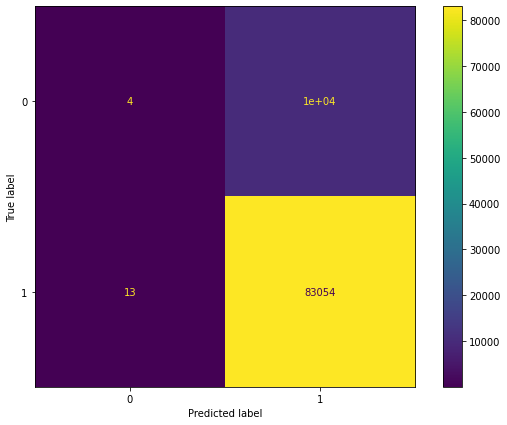

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
matrix = confusion_matrix(df_targets_test, prediction_logreg, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                             display_labels=logreg.classes_)
disp.plot(ax=ax)
plt.show()

# Feature Importance

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = train_inputs.columns)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(logreg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', logreg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,6.827845e-03
1,grade_A,8.112169e-03
2,grade_B,9.087635e-03
3,grade_C,1.687107e-03
4,grade_D,-3.744074e-03
...,...,...
86,total_acc,5.362337e-03
87,acc_now_delinq,-1.258082e-05
88,total_rev_hi_lim,8.217454e-07
89,annual_inc,8.029881e-06


In [ ]:
summary_table['Feature name'].values

array(['Intercept', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'home_ownership_ANY', 'home_ownership_MORTGAGE',
       'home_ownership_NONE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_state_CT', 'addr_state_DC', 'addr_state_DE', 'addr_state_FL',
       'addr_state_GA', 'addr_state_HI', 'addr_state_IA', 'addr_state_ID',
       'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_KY',
       'addr_state_LA', 'addr_state_MA', 'addr_state_MD', 'addr_state_ME',
       'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS',
       'addr_state_MT', 'addr_state_NC', 'addr_state_NE', 'addr_state_NH',
       'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY',
       'addr_state_OH', 'addr_state_OK', 'addr_state_OR', 'addr_state_PA',
       'addr_state_RI', 'addr_state_SC', 'addr_state_SD', 'addr_st

In [ ]:
for i in range(len(summary_table)):
  summary_table['Coefficients'] = summary_table.Coefficients.replace(summary_table.Coefficients[i],abs(summary_table.Coefficients[i]))

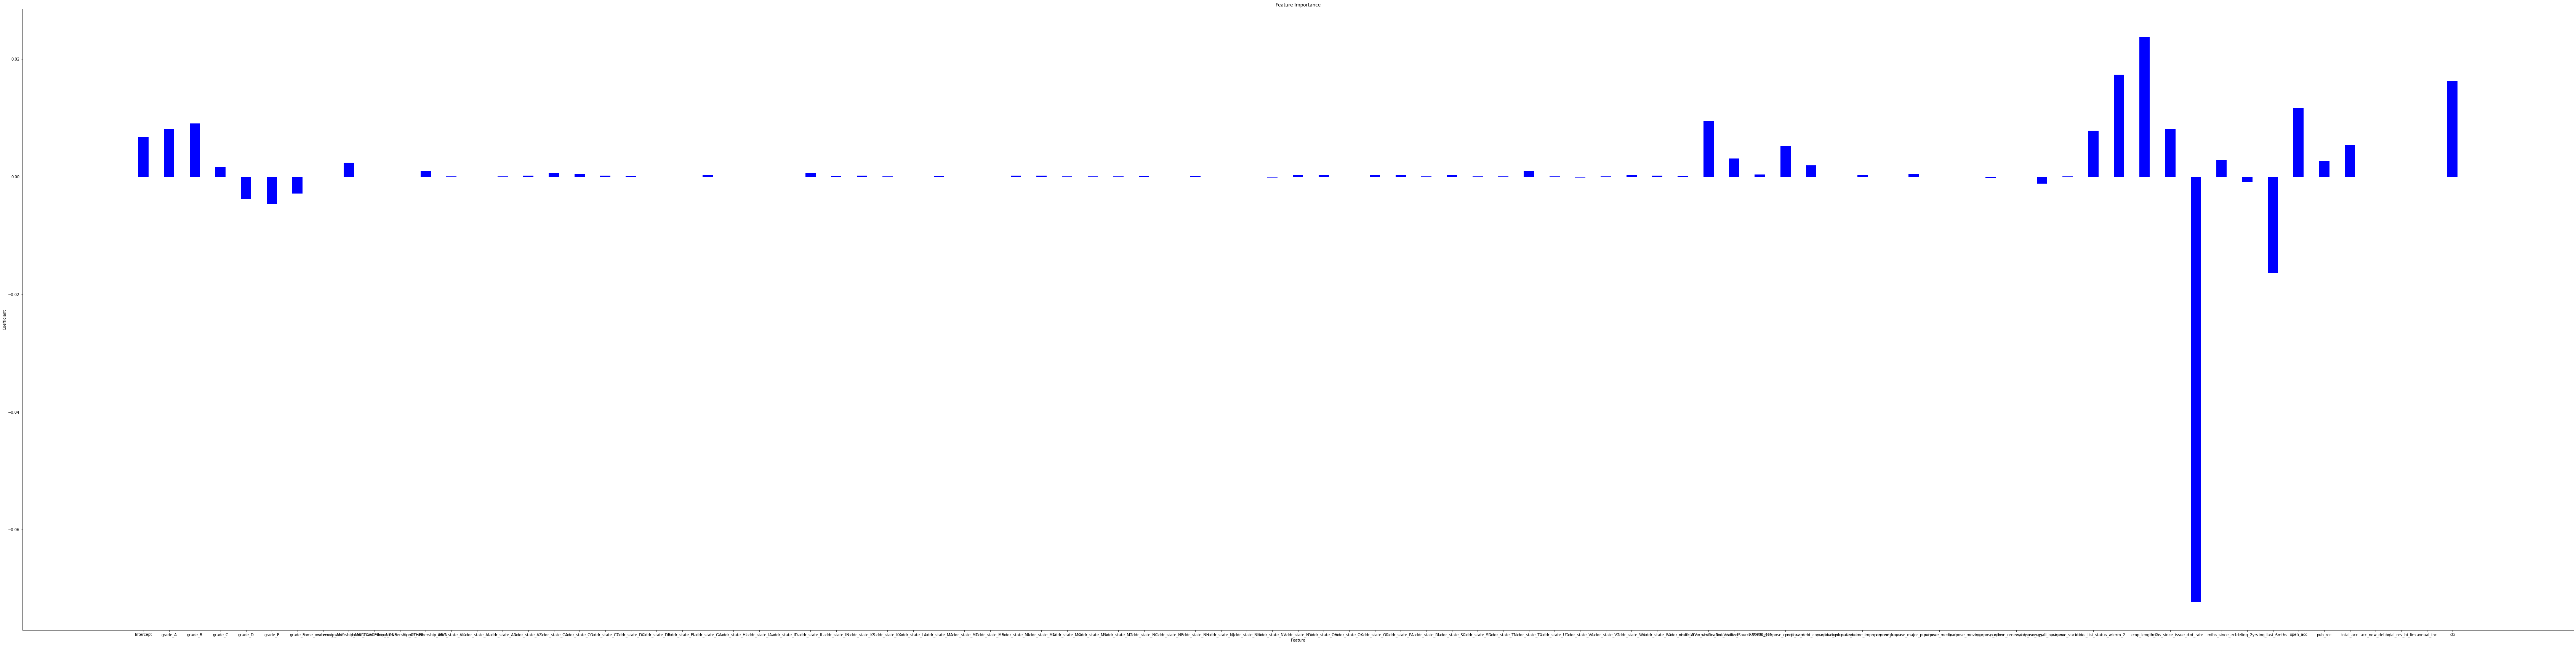

In [ ]:
courses = list(summary_table['Feature name'].unique())
values = list(summary_table['Coefficients'].unique())
  
fig = plt.figure(figsize = (120, 30))
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Feature Importance")
plt.show()

In [ ]:
Feature_importance = summary_table.sort_values(["Coefficients"], ascending=False)
imp = Feature_importance.head(5)

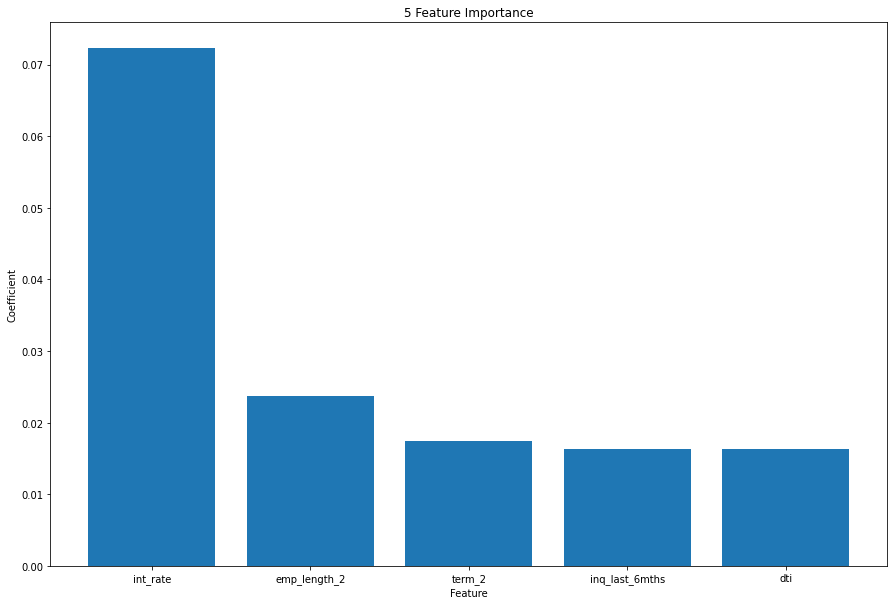

In [ ]:
feature = list(imp['Feature name'].values)
values = list(imp['Coefficients'].values)
  
fig = plt.figure(figsize = (15, 10))
plt.bar(feature, values)
 
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("5 Feature Importance")
plt.show()